In [33]:
#Khai báo thư viện
#thư viên xử lý ma trận
import numpy as np
#thư viện đọc địa chỉ hình ảnh
import os
#thư viện xử lý về hình ảnh
from PIL import Image
#thư viện dùng để vẽ
import matplotlib.pyplot as plt
#thư viện hàm chạy mô hình 
from keras.models import Sequential
#thư viện tạo mảng noron
from keras.layers import Dense,Activation,Dropout
#thư viện dành cho phương pháp trọng số
from tensorflow.keras.optimizers import RMSprop
#thư viện gọi hàm dừng sớm
from keras.callbacks import EarlyStopping
#thư viện phân loại ảnh
from keras.backend import categorical_crossentropy
# thư viện xử lý chuyển class
from keras.utils import np_utils

In [34]:
#khai bien doc dia chi
#địa chỉ train
train_data ='drive/MyDrive/bai tap ve nha/hinh/train'
#địa chỉ test
test_data='drive/MyDrive/bai tap ve nha/hinh/test'
#địa chỉ validation
validation_data='drive/MyDrive/bai tap ve nha/hinh/validation'

In [35]:
#lệnh liên kết driver
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#đặt tên biến train, test, validation
listdata_train=[]
listdata_test=[]
listdata_validation=[]
#tạo từ điển 
dict={'linh':[1, 0],'cat':[0, 1]}

In [37]:
def Getdata(dirdata,lstdata):
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[5]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [38]:
#đem các train_data,test_data,validation gán
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)
listdata_validation=Getdata(validation_data,listdata_validation)

In [39]:

x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(95, 2)

In [40]:

x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])

In [41]:
#gan bien 
class_names=['linh','cat']
x_pre=x_test
y_pre=y_test
y_pre

array([[0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1]])

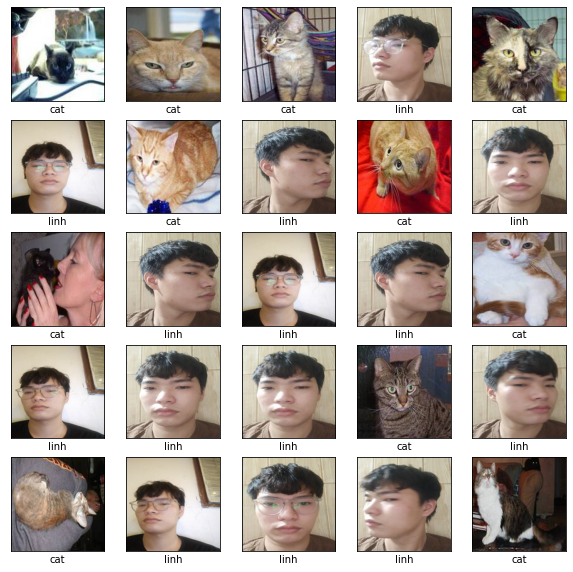

In [42]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [43]:
from keras.utils import np_utils
x_train=x_train.reshape(95,67500)
x_test=x_test.reshape(44,67500)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [44]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(67500,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               34560512  
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 35,086,850
Trainable params: 35,086,850
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [46]:
history=model.fit(x_train,y_train,batch_size=90,epochs=200,verbose=1)

Epoch 1/200
2/2 [==============================] - 2s 329ms/step - loss: 28.4523 - accuracy: 0.5368
Epoch 2/200
2/2 [==============================] - 1s 286ms/step - loss: 40.1554 - accuracy: 0.4421
Epoch 3/200
2/2 [==============================] - 1s 289ms/step - loss: 95.1154 - accuracy: 0.4421
Epoch 4/200
2/2 [==============================] - 1s 305ms/step - loss: 37.2263 - accuracy: 0.5053
Epoch 5/200
2/2 [==============================] - 1s 294ms/step - loss: 12.1730 - accuracy: 0.4421
Epoch 6/200
2/2 [==============================] - 1s 287ms/step - loss: 10.2503 - accuracy: 0.4421
Epoch 7/200
2/2 [==============================] - 1s 293ms/step - loss: 7.1970 - accuracy: 0.4211
Epoch 8/200
2/2 [==============================] - 1s 272ms/step - loss: 9.0695 - accuracy: 0.4842
Epoch 9/200
2/2 [==============================] - 1s 291ms/step - loss: 4.1777 - accuracy: 0.4421
Epoch 10/200
2/2 [==============================] - 1s 288ms/step - loss: 6.9900 - accuracy: 0.5053
Epo

In [47]:
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.10445769131183624
Test accuary 0.9772727489471436


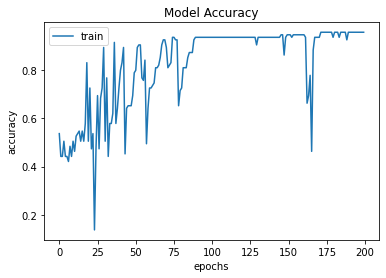

In [48]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

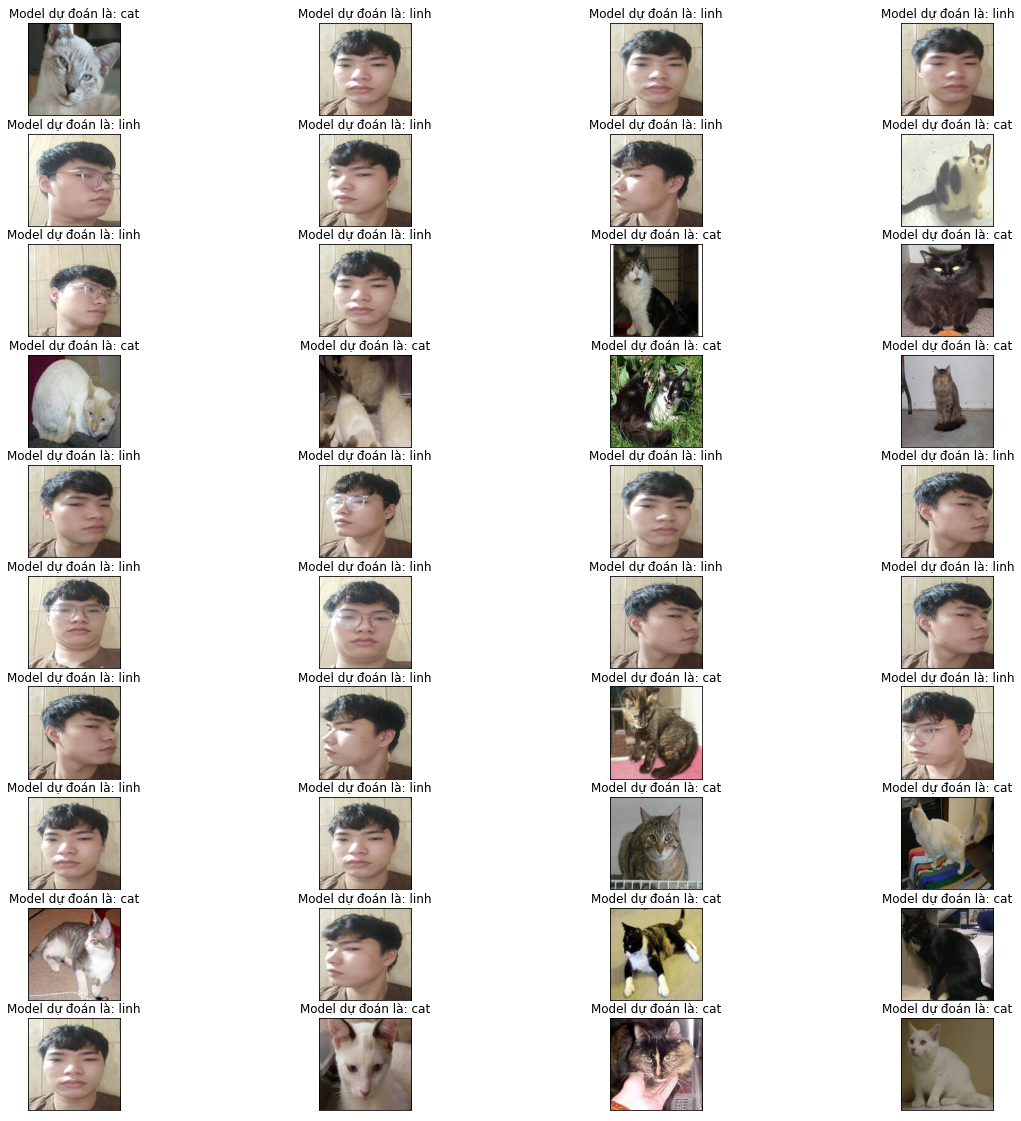

In [49]:
plt.figure(figsize=(20, 20))
for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pre[i], cmap='binary')
    plt.title("Model dự đoán là: " + str(class_names[np.argmax(model.predict(x_pre[i].reshape((-1,67500))))]))
plt.show()